### Import Libraries

In [91]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Merging 12 months of sales data into one

In [3]:
files = [file for file in os.listdir('./data/')]
files

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [4]:
def combine_multiple_csv(directory_path: str) -> pd.DataFrame(): # type: ignore
    files = [file for file in os.listdir(directory_path)]
    all_month_data = pd.DataFrame()
    for file in files:
        df = pd.read_csv(directory_path+file)
        all_month_data = pd.concat([all_month_data, df], ignore_index=True)
    return all_month_data.to_csv("all_month_data.csv", index=False)

In [5]:
combine_multiple_csv('./data/')

Read Updated DataFrame

In [6]:
data = pd.read_csv("all_month_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Clean up the data

#### Drop rows with NaN

In [9]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [10]:
nan_df = data[data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data = data.dropna(how='all')
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

#### Remove the Invalid Literal 'Or' in Month Column

In [12]:
data['Month'].value_counts()

Month
12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: count, dtype: int64

In [14]:
temp_df = data[data['Order Date'].str[0:2]=='Or']
temp_df.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


so here the header is duplicated in the rows that's why the fetched month from orderdate couldn't convert to int so need to drop these rows.

In [15]:
data = data[data['Order Date'].str[0:2]!='Or']
data.Month.value_counts()

Month
12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Name: count, dtype: int64

#### Convert Columns (Quantity Ordered, Price Each) to the correct type

In [17]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

### Augment Data with Additional Columns

#### Add Month Column


In [16]:
data['Month'] = data['Order Date'].str[:2]
data['Month'] = data['Month'].astype('int32')
type(data['Month'][0])

numpy.int32

#### Add Sales Column

Sales = Quantity Ordered * Price Each

In [18]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Add City Column

In [49]:
def get_city(address: str) -> str:
    return address.split(',')[1].strip()

def get_state(address: str) -> str:
    return address.split(',')[2].strip().split(' ')[0]

data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


### Scenarios

#### 1. What was the best month for sales? How much was earned that month?

In [65]:
[month for month, df in data.groupby('Month')]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [32]:
results = data.groupby('Month').sum()[['Quantity Ordered', 'Sales']]
results

,Quantity Ordered,Sales
Month,,
1,10903,1822256.73
2,13449,2202022.42
3,17005,2807100.38
4,20558,3390670.24
5,18667,3152606.75
6,15253,2577802.26
7,16072,2647775.76
8,13448,2244467.88
9,13109,2097560.13


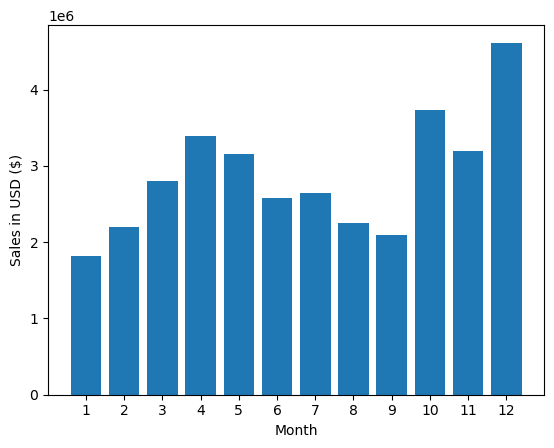

In [33]:
months = range(1, 13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

#### 2. Which City had the highest number of sales?

In [47]:
city_results = data.groupby('City').sum()[['Quantity Ordered','Sales']]
city_results

,Quantity Ordered,Sales
City,,
Atlanta (GA),16602,2795498.58
Austin (TX),11153,1819581.75
Boston (MA),22528,3661642.01
Dallas (TX),16730,2767975.40
Los Angeles (CA),33289,5452570.80
New York City (NY),27932,4664317.43
Portland (ME),2750,449758.27
Portland (OR),11303,1870732.34
San Francisco (CA),50239,8262203.91


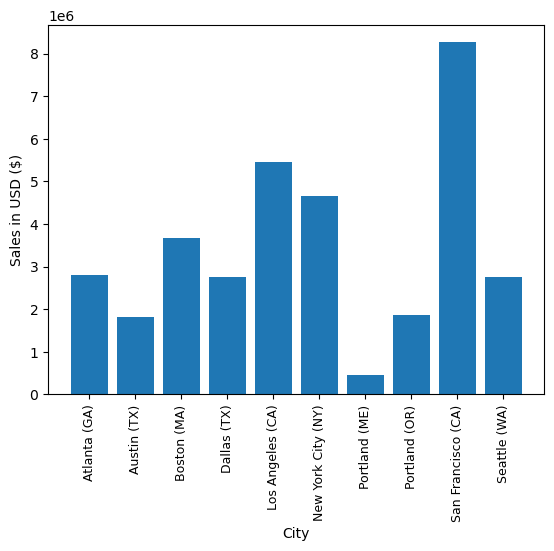

In [66]:
cities = [city for city, df in data.groupby('City')]

plt.bar(cities, city_results['Sales'])
plt.xticks(cities, rotation=90, size=9)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

#### What time should we display advertisements to maximize likelihood of customer's buying product?

In [68]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [69]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

/var/folders/nd/q79n0hd51vqcq6swmwgkc95w0000gn/T/ipykernel_56986/3021409918.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


In [70]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [72]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


**can do the city wise adv time also**

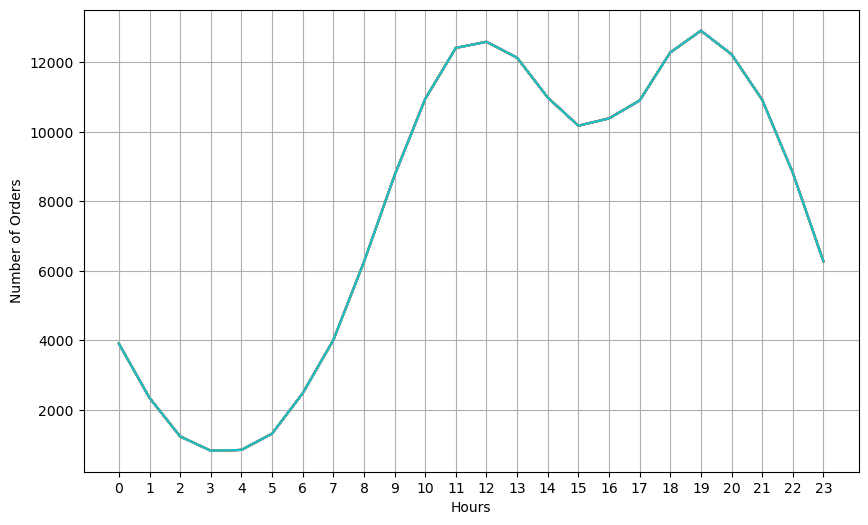

In [86]:
hours = [hour for hour, df in data.groupby('Hour')]
plt.figure(figsize=(10, 6))
plt.plot(hours, data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

Recommended time to display add is around 11 am (11) or 7 pm (19)

#### 4. What products are most often sold together?

In [87]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [88]:
order_id_df = data[data["Order ID"].duplicated(keep=False)]
order_id_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,23.90,New York City (NY),14,32
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin (TX),12,27
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin (TX),12,27
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston (MA),14,49
67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston (MA),14,49


In [89]:
order_id_df['Grouped'] = order_id_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
order_id_df.head()

/var/folders/nd/q79n0hd51vqcq6swmwgkc95w0000gn/T/ipykernel_56986/977716136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_id_df['Grouped'] = order_id_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,"Vareebadd Phone,USB-C Charging Cable"


In [90]:
order_id_df = order_id_df[['Order ID', 'Grouped']].drop_duplicates()
order_id_df.head(10)

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [97]:
count = Counter()

for row in order_id_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

#count.most_common(15)

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

In [98]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


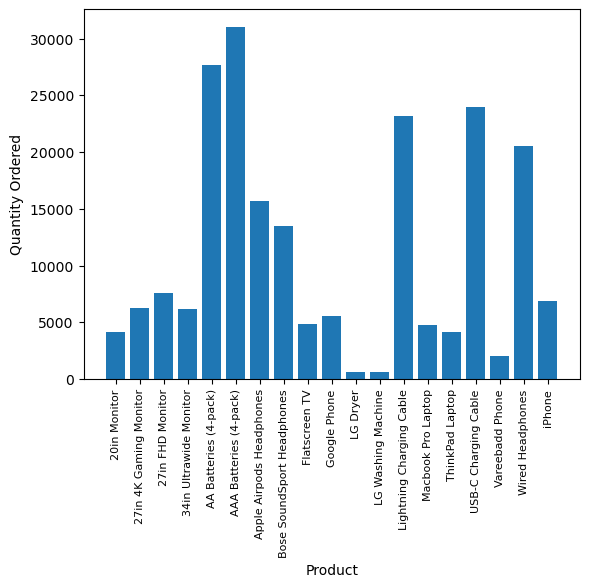

In [101]:
product_group = data.groupby('Product')[['Product', 'Quantity Ordered']]
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int32         
 10  Minute            185950 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(4)
memory usage: 18.9+ MB


In [106]:
prices = data.groupby('Product')['Price Each'].mean()
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/var/folders/nd/q79n0hd51vqcq6swmwgkc95w0000gn/T/ipykernel_56986/2326419175.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical')


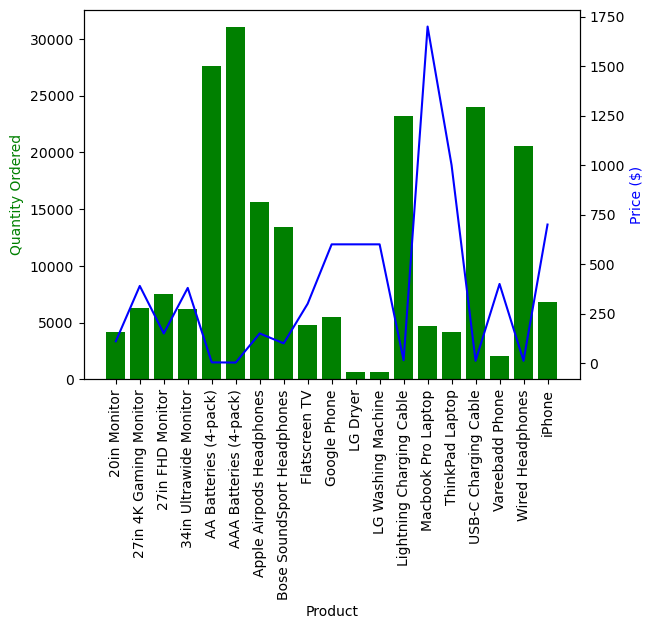

In [115]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xlabel('Product')
ax1.set_xticklabels(products, rotation='vertical')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
plt.show()